### ANOVA

### Problématique


Existe-t-il des différences significatives dans les niveaux de dépenses, c'est-à-dire les sommes d'argent allouées par les gouvernements, les entreprises ou les ménages pour divers besoins, entre les différents groupes de pays (émergents, développés et en développement) ?

#### Étape 1: Importation des bibliothèques nécessaires

In [223]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt


#### Étape 2: Chargement de jeu de données

In [225]:

data = pd.read_csv('dataset_fin.csv')
df = pd.DataFrame(data)

In [226]:
data.head()

,Unnamed: 0,Reference area,GDP,TIME_PERIOD,Income,Expenditure,Components of aggregate demand,Production,Households,Government,Government expenditure by fun,Corporations,Capital,Economic_Classification
0,0,Australia,3.441992,2022,2.630387,6.318369,3.090439,3.665822,39871.843115,37.198877,37.198877,2.826235,102.959793,Emerging
1,1,Austria,5.277894,2022,0.676556,4.911191,2.438285,6.070283,40299.683652,53.010387,53.010387,3.702775,102.748410,Emerging
2,2,Belgium,4.233432,2022,0.945041,3.635884,1.815193,4.515443,36499.838230,52.240785,52.240785,5.092422,102.937581,Developing
3,3,Canada,4.189036,2022,5.478162,5.464745,2.960486,4.139944,34203.373443,41.238013,41.238013,6.555331,103.696381,Emerging
4,4,Chile,2.058740,2022,-1.181835,1.642339,1.019797,2.282649,16552.007381,27.749244,27.749244,4.490536,103.703984,Developing


In [230]:
data.columns = data.columns.str.strip()  # Supprime les espaces
print(data.columns.tolist())  # Affiche les noms de colonnes

['Unnamed: 0', 'Reference area', 'GDP', 'TIME_PERIOD', 'Income', 'Expenditure', 'Components of aggregate demand', 'Production', 'Households', 'Government', 'Government expenditure by fun', 'Corporations', 'Capital', 'Economic_Classification']


In [232]:
print(data.columns)  # Pour voir les noms de colonnes exacts

Index(['Unnamed: 0', 'Reference area', 'GDP', 'TIME_PERIOD', 'Income',
       'Expenditure', 'Components of aggregate demand', 'Production',
       'Households', 'Government', 'Government expenditure by fun',
       'Corporations', 'Capital', 'Economic_Classification'],
      dtype='object')


In [234]:
# Renommer les colonnes pour enlever les espaces
df.columns = df.columns.str.strip()

#### Étape 3: Formulation des Hypothèses

Avant de procéder à l'analyse exploratoire des données, nous formulons les hypothèses suivantes :

- **Hypothèse Nulle (H0)** : Il n'y a pas de différence significative dans les dépenses  entre les différents groupes de classification économique (Emerging, Developing, Developed).
- **Hypothèse Alternative (H1)** : Il existe au moins une différence significative dans les dépenses entre les groupes de classification économique.

#### Étape 4: Visualisation Préliminaire

Rôle du Boxplot Avant l'ANOVA

Exploration Visuelle :
Le boxplot permet d'explorer visuellement la distribution des données avant d'appliquer l'ANOVA. Cela aide à comprendre les tendances et les variations au sein de chaque groupe.

Identification des Différences :
Il met en évidence les différences potentielles entre les groupes, ce qui peut justifier l'application d'ANOVA pour tester l'hypothèse selon laquelle les moyennes des groupes sont égales.

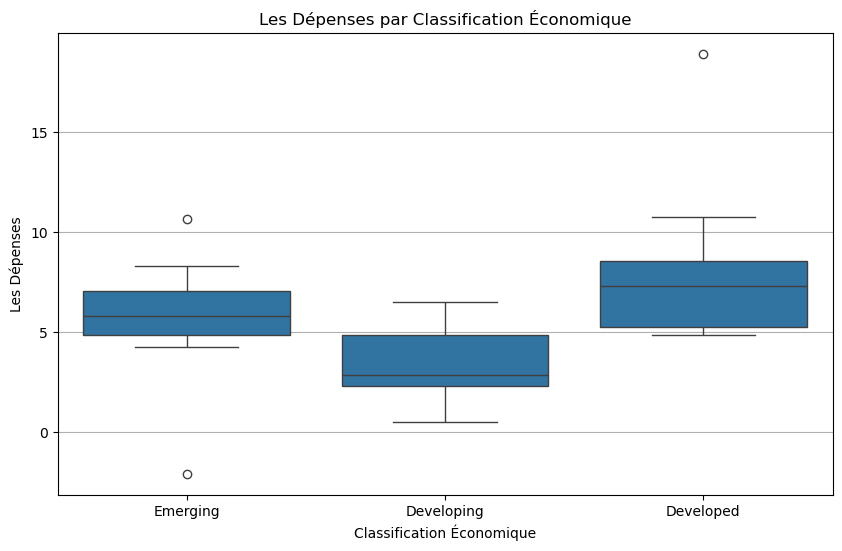

In [241]:
# Créer un boxplot pour visualiser les dépenses par classification économique
plt.figure(figsize=(10, 6))
sns.boxplot(x='Economic_Classification', y='Expenditure', data=df)
plt.title('Les Dépenses par Classification Économique')
plt.xlabel('Classification Économique')
plt.ylabel('Les Dépenses')
plt.grid(axis='y')
plt.show()

**Interprétation des résultats**

Les boxplots montre clairement qu'il existe des différences notables dans les niveaux de dépenses  entre les trois classifications économiques.

On observe que les dépenses dans les groupes se diffère:

Developing (En développement) : La médiane des dépenses est légèrement inférieure à 5.

Emerging (Émergents) : La médiane se situe autour de 5.

Developed (Développés) : La médiane est d'environ 10.

Valeurs Aberrantes :
Les points au-dessus ou en dessous des "whiskers" (tassons) sont des valeurs aberrantes, signalant des dépenses qui sont significativement plus élevées ou plus faibles que le reste des données.

Ces résultats soulignent l'influence des classifications économiques sur les dépenses gouvernementales.
les pays développés dépensent en moyenne plus que les pays émergents , qui eux-mêmes dépensent plus que les pays en développement.

#### Étape 4: ANOVA

Les différences observées dans les dépenses entre les groupes justifient l'application de l'ANOVA pour tester statistiquement si ces différences sont significatives, renforçant la validité des analyses.

In [250]:

model = ols('Expenditure ~ C(Economic_Classification)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [251]:

# Afficher la table ANOVA
print(anova_table)

                                sum_sq    df         F    PR(>F)
C(Economic_Classification)  177.284689   2.0  12.45836  0.000047
Residual                    327.294098  46.0       NaN       NaN


**Interprétation des résultats**

Statistique F :
F : 12.45836
La valeur F est le rapport de la variabilité entre les groupes à la variabilité au sein des groupes. Une valeur F élevée suggère que les différences entre les groupes sont plus grandes que la variabilité interne, ce qui est un indicateur fort de l'existence de différences significatives.

Valeur p (PR(>F)) :
PR(>F) : 0.000047
La valeur p est très inférieure au seuil conventionnel de 0.05, ce qui permet de rejeter l'hypothèse nulle. Cela signifie qu'il existe des différences significatives dans les dépenses  selon la classification économique.


#### Résumé

Ces résultats  de l'ANOVA  permettent de répondre à la problématique en illustrant  qu'il existe des différences significatives dans les dépenses  selon la classification économique.